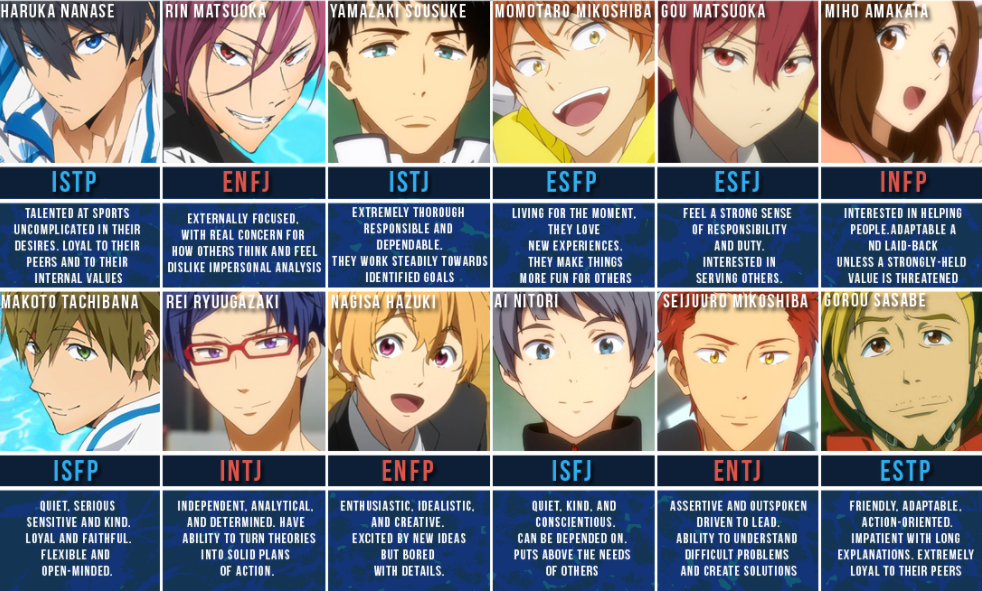

In [ ]:
path="/content/drive/MyDrive/AI/Project/mbti_1.csv"

Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(path)
dataset.sample(4)

,type,posts
280,INTJ,'I believe that something cannot come from not...
8174,ENFP,'I'm shy at the beginning. I need to get my b...
5418,INFP,"'To be honest, I just stopped looking for rela..."
7847,INFJ,'I am just imagining a teacher starting this t...


In [ ]:
dataset['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset)):
    posts = re.sub('[^a-zA-Z]',' ', dataset['posts'][i])
    posts = posts.lower()
    posts = posts.split()
    ps = PorterStemmer()
    posts = [ps.stem(word) for word in posts if not word in set(stopwords.words('english'))]
    posts = ' '.join(posts)
    corpus.append(posts)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus[0]

'http www youtub com watch v qsxhcwe krw http media tumblr com tumblr lfouy pma qa rooo jpg enfp intj moment http www youtub com watch v iz le g xm sportscent top ten play http www youtub com watch v ucdfz etec prank life chang experi life http www youtub com watch v vxzeywwrdw http www youtub com watch v u ejam dp e repeat today may perc experi immers last thing infj friend post facebook commit suicid next day rest peac http vimeo com hello enfj sorri hear distress natur relationship perfect time everi moment exist tri figur hard time time growth http wallpaperpass com upload friendship boy girl wallpap jpg http asset dornob com wp content upload round home design jpg welcom stuff http playeress com wp content upload red red pokemon master jpg game set match prozac wellbrutin least thirti minut move leg mean move sit desk chair weed moder mayb tri edibl healthier altern basic come three item determin type whichev type want would like use given type cognit function whatnot left thing m

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
dataset['type of encoding'] = enc.fit_transform(dataset['type'])
dataset.sample(5)

,type,posts,type of encoding
1909,INTJ,'I also think he's 8w7 So/Sp which is exactly ...,10
5301,INTP,'The Robot is a Reaper; a sentient machine bei...,11
5348,ISTP,"'I've known MBTI ever since I was 13, and my f...",15
4221,INTP,'You could always create a Golem that looks ex...,11
2389,INFP,'I just got off the phone with him. We only sp...,9


In [ ]:
enc.classes_

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 4000)
X = cv.fit_transform(corpus).toarray()    #(8675, 101380)
y = dataset.iloc[:, 2].values

In [ ]:
y.shape

(8675,)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Log_clf=LogisticRegression(max_iter=300,C=0.5,n_jobs=-1)
Log_clf.fit(X_train,y_train)

y_pred = Log_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 14   4   0   1   0   0   0   0   5  12   2   2   0   2   1   2]
 [  0 117   2  12   0   0   0   0  12  19  13  11   3   3   7   3]
 [  0   2  27   6   0   0   0   0   3   6   6   9   0   1   0   1]
 [  3  14   3  99   0   0   0   1  22  13  15  32   2   5   2   4]
 [  0   1   0   1   2   0   0   0   2   2   0   1   1   1   1   0]
 [  1   0   1   1   0   2   0   0   3   1   2   2   0   1   1   0]
 [  0   2   0   2   1   0   0   0   1   2   2   2   0   0   1   1]
 [  0   1   1   0   0   0   0  10   1   1   3   4   0   0   1   1]
 [  4  13   6  12   0   0   0   0 313  60  21  10   1   2   2   4]
 [  5  19   1   8   0   1   0   3  46 391  18  29   2   8   3   5]
 [  0  11   7  12   0   1   0   0  27  25 180  43   2   1   3   6]
 [  1   9   2  18   1   1   0   1  31  31  35 279   0   3   0   3]
 [  3   1   0   1   0   1   0   0   7   7   1   2  19   3   0   1]
 [  0   8   2   1   0   0   0   1  13  20   1   6   2  35   0   2]
 [  0   4   0   4   0   0   0   0   4   5   7  15   0   0  18 

In [ ]:
LS=Log_clf.score(X_test,y_test) 
LS  #0.6043027276219747

0.6012293507491356

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Kn_clf=KNeighborsClassifier(n_neighbors=101)
Kn_clf.fit(X_train,y_train)

y_pred = Kn_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   0   0   0   0   0   0   3  38   1   1   0   0   0   0]
 [  0  57   0   5   0   0   0   0  11 104  12  10   1   0   1   1]
 [  0   1   2   1   0   0   0   0   1  28  12  16   0   0   0   0]
 [  0   3   0  41   0   0   0   0   4 115  12  40   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   8   1   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   8   2   4   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  10   2   2   0   0   0   0]
 [  0   0   0   0   0   0   0   2   2  13   3   3   0   0   0   0]
 [  0   6   0   1   0   0   0   0 141 252  18  30   0   0   0   0]
 [  1   1   0   0   0   0   0   0  15 496   8  18   0   0   0   0]
 [  0   0   0   2   0   0   0   0  10 135 124  47   0   0   0   0]
 [  0   0   0   2   0   0   0   0  13 152  18 230   0   0   0   0]
 [  0   1   0   0   0   0   0   0   3  31   1   8   2   0   0   0]
 [  0   1   0   0   0   0   0   0   2  82   1   4   0   1   0   0]
 [  0   0   0   0   0   0   0   0   1  42   1  13   0   0   1 

In [ ]:
KS=Kn_clf.score(X_test,y_test) #0.43987706492508644
KS

0.42258932001536686

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = NB_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  5   8   1   3   0   0   0   0  12   4   1   2   0   2   0   7]
 [  6  38  11  16   0   0   0   0  24  40  19   5   3  18   4  18]
 [  2   1   6  10   0   0   0   0   5   5  11  11   1   3   1   5]
 [  5   8  21  42   0   0   0   0  19  18  25  31   1   9   7  29]
 [  1   1   0   1   0   0   0   0   2   3   1   0   0   0   1   2]
 [  0   3   2   0   0   0   0   0   1   3   1   0   0   1   0   4]
 [  0   2   3   3   0   0   0   0   0   1   3   0   0   0   0   2]
 [  1   2   2   3   0   0   0   0   1   1   2   2   0   1   1   7]
 [ 15  39  32  27   0   0   0   0 108  74  37  29   3  25  12  47]
 [ 12  55  32  21   0   0   1   0  68 162  27  47   2  34  12  66]
 [  8  12  28  29   0   0   0   1  23  28  68  65   3  16   8  29]
 [  6  12  29  43   0   0   0   1  19  51  62 104   1  15  13  59]
 [  1   6   3   6   0   0   0   0   6   9   1   2   0   5   1   6]
 [  2  12   7   6   0   0   0   0  12   8   8   8   1  12   3  12]
 [  1   8   2   6   0   0   0   0   4   7  12  10   1   2   0 

In [ ]:
NS=NB_clf.score(X_test,y_test) #0.2320399538993469
NS

0.215904725316942

In [ ]:
#support vactor
from sklearn.svm import SVC
svc_clf=SVC(kernel='rbf')
svc_clf.fit(X_train,y_train)

# Predicting the Test set results
y_pred = svc_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 11   3   0   0   0   0   0   0   7  16   3   3   0   0   1   1]
 [  0 122   0   7   0   0   0   0  14  31  10   9   3   0   4   2]
 [  0   3  21   3   0   0   0   0   2   6  11  14   0   1   0   0]
 [  1   8   0 120   0   0   0   1  18  17  15  31   1   1   1   1]
 [  0   0   0   1   0   0   0   0   5   2   0   2   1   0   1   0]
 [  0   0   0   1   0   0   0   0   3   4   3   4   0   0   0   0]
 [  0   0   1   3   0   0   0   0   1   4   3   1   0   0   1   0]
 [  0   1   1   0   0   0   0   6   4   4   2   4   0   0   0   1]
 [  2  10   1   6   0   0   0   0 324  71  15  15   0   0   1   3]
 [  5   8   2   4   0   0   0   2  34 444  10  23   0   2   2   3]
 [  0   2   3   9   0   0   0   0  21  32 205  44   0   0   1   1]
 [  0   1   1  11   0   0   0   0  24  37  15 325   0   0   0   1]
 [  1   1   0   1   0   0   0   0  10  13   1   4  15   0   0   0]
 [  0   3   1   1   0   0   0   1  14  36   2   4   0  27   0   2]
 [  0   1   0   1   0   0   0   0   7  15   6  14   0   0  14 

In [ ]:
SVC_S=svc_clf.score(X_test,y_test) #0.6570605187319885
SVC_S

0.6484825201690357

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(max_depth=14)
tree_clf.fit(X_train,y_train)

# Predicting the Test set results
y_pred = tree_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  7   6   0   0   0   0   0   1   5  13   4   2   1   0   1   5]
 [  4  82  11  11   1   0   1   1  24  33  17  10   0   3   1   3]
 [  1   4  12   4   0   0   0   0   3  14  13   4   0   2   3   1]
 [  1  13   6  89   0   0   0   0  20  33  21  24   0   3   2   3]
 [  0   2   0   1   0   0   0   0   1   4   0   2   1   0   1   0]
 [  0   0   1   3   0   0   0   0   3   4   0   1   0   1   1   1]
 [  1   0   2   0   0   0   0   0   1   4   1   2   1   0   1   1]
 [  0   0   0   2   0   0   1   1   0   7   2   4   0   2   2   2]
 [  8  10   5  13   0   1   1   3 271  82  23  25   0   1   1   4]
 [  7  13   8  13   0   0   0   0  29 404  26  19   2   6   4   8]
 [  6  16   7   6   1   0   0   1  25  46 169  22   6   6   3   4]
 [  2   3   4  23   4   0   0   0  22  55  17 280   2   3   0   0]
 [  2   1   0   4   0   0   0   0   7  13   3   4   8   2   1   1]
 [  1   7   3   3   0   0   0   0   9  34   8   7   1  13   0   5]
 [  1   5   2   1   0   0   0   0   5  13   1   6   0   1  23 

In [ ]:
TS=tree_clf.score(X_test,y_test)  
TS  #0.5509028044563965

0.5412985017287745

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(n_estimators=300)
forest_clf.fit(X_train,y_train)

# Predicting the Test set results
y_pred = forest_clf.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   2   0   0   0   0   0   0  11  27   3   2   0   0   0   0]
 [  0  69   0   6   0   0   0   0  32  78   7  10   0   0   0   0]
 [  0   0   1   2   0   0   0   0   6  18  17  17   0   0   0   0]
 [  0   6   0  72   0   0   0   0  38  49   9  41   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1  10   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   4   5   3   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   8   2   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9   9   2   3   0   0   0   0]
 [  0   5   0   1   0   0   0   0 304 114   7  17   0   0   0   0]
 [  0   0   0   2   0   0   0   0  27 486   8  15   0   0   0   1]
 [  0   0   0   2   0   0   0   0  33  71 156  56   0   0   0   0]
 [  0   0   0   7   0   0   0   0  17  93   6 292   0   0   0   0]
 [  0   0   0   0   0   0   0   0   8  31   1   6   0   0   0   0]
 [  0   2   0   0   0   0   0   0  14  67   1   7   0   0   0   0]
 [  0   1   0   0   0   0   0   0   7  40   2   8   0   0   0 

In [ ]:
FS=forest_clf.score(X_test,y_test)   
FS  #0.5282366500192086

0.5366884364195159

In [ ]:
#XGboost
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

# Predicting the Test set results
y_pred = model_xgb.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 22   3   0   0   0   0   0   0   4  10   3   0   0   0   1   2]
 [  1 130   0   6   0   0   0   0  17  21   9  12   2   0   2   2]
 [  1   2  33   3   0   0   0   0   1   6   4   7   1   1   1   1]
 [  0   6   1 141   0   0   0   4  22   9   9  18   1   2   2   0]
 [  0   1   0   1   2   0   0   0   1   3   0   1   1   1   1   0]
 [  0   1   0   1   0   0   0   0   3   3   2   2   0   2   0   1]
 [  0   1   0   0   0   0   2   0   2   4   0   3   0   0   2   0]
 [  0   0   2   1   0   0   0  10   2   3   2   2   0   0   0   1]
 [  1   9   2  11   0   0   0   2 341  48  16  13   2   1   1   1]
 [  4  12   2   7   0   0   0   1  43 427  16  17   2   4   1   3]
 [  2   7   6   9   0   0   0   0  18  26 211  32   1   2   1   3]
 [  1   5   4  21   0   0   0   1  13  35  12 321   0   2   0   0]
 [  1   1   1   1   0   0   0   0   7   8   2   3  21   0   0   1]
 [  0   2   0   1   0   0   0   2   8  19   1   6   0  48   0   4]
 [  1   3   0   0   0   0   0   1   4   8   2   8   0   2  28 

In [ ]:
XGB_S=model_xgb.score(X_test,y_test)  
XGB_S #0.6915097963887822

0.6953515174798309

In [ ]:
accouracy = {'Models': ['Logistic Regression', 'K Nearest Neighbors', 'Naive bayes', 'SVC','Decision tree', 'Random Forest','XGBoost'], 'Scores': [LS, KS, NS,SVC_S,TS,FS,XGB_S ]}  
 
accouracy = pd.DataFrame(accouracy) 


In [ ]:
accouracy.sort_values('Scores',ascending=False)

,Models,Scores
6,XGBoost,0.695352
7,XGBoost(LDA),0.694170
3,SVC,0.648483
0,Logistic Regression,0.601229
4,Decision tree,0.541299
5,Random Forest,0.536688
1,K Nearest Neighbors,0.422589
2,Naive bayes,0.215905


In [ ]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#XGboost
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   3   2   3   0   0   0   1  10  12   3   4   0   2   2   3]
 [  0  90   3  21   2   1   2   6  14  31   7   6   1  12   2   4]
 [  0   6   1  18   1   0   1   0   2   3   6  15   0   1   2   5]
 [  0  35   9  57   1   0   0   9  18  15  22  23   0  11   5  10]
 [  0   1   0   0   0   0   0   1   2   0   1   5   0   2   0   0]
 [  0   3   0   1   0   0   2   1   1   1   5   0   0   0   0   1]
 [  0   2   0   4   0   0   0   1   2   1   3   0   0   0   0   1]
 [  0   4   2   1   0   0   0   0   3   1   4   4   0   0   2   2]
 [  0  44   3  18   9   0   2   5 131 116  37  42   0  27   2  12]
 [  0  63   6  20   5   1   1   5 129 178  21  39   3  30  12  26]
 [  0  16   7  39   3   0   2   3  49  31  56  85   2   7   9   9]
 [  1  16   8  40   6   0   0   6  68  31  75 123   1  17   6  17]
 [  0   4   0   0   1   0   0   3   9  10  11   5   0   2   1   0]
 [  0  13   3   8   0   0   0   0  24  19   8   7   0   8   1   0]
 [  0  10   1   7   0   0   0   1   6   8   8  10   1   3   2 

In [ ]:
XGBoost_lda_S=classifier.score(X_train,y_train)
XGBoost_lda_S

0.6941699604743083

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

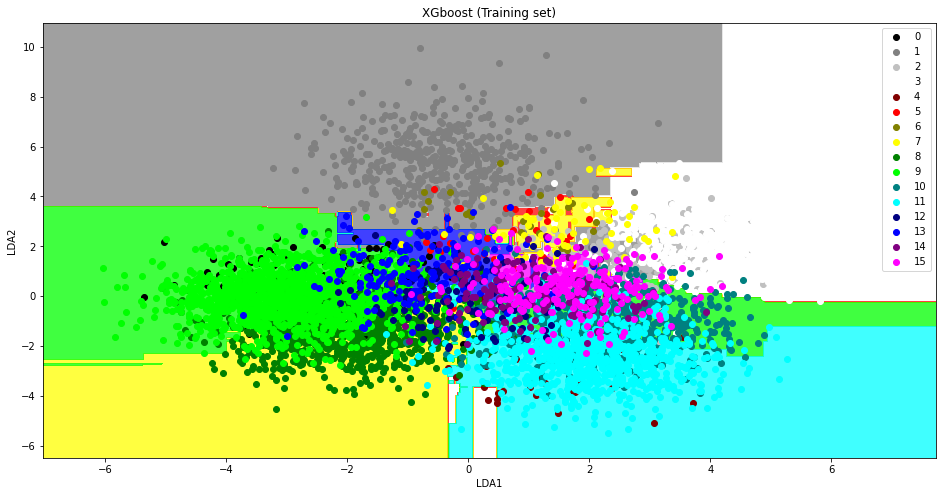

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

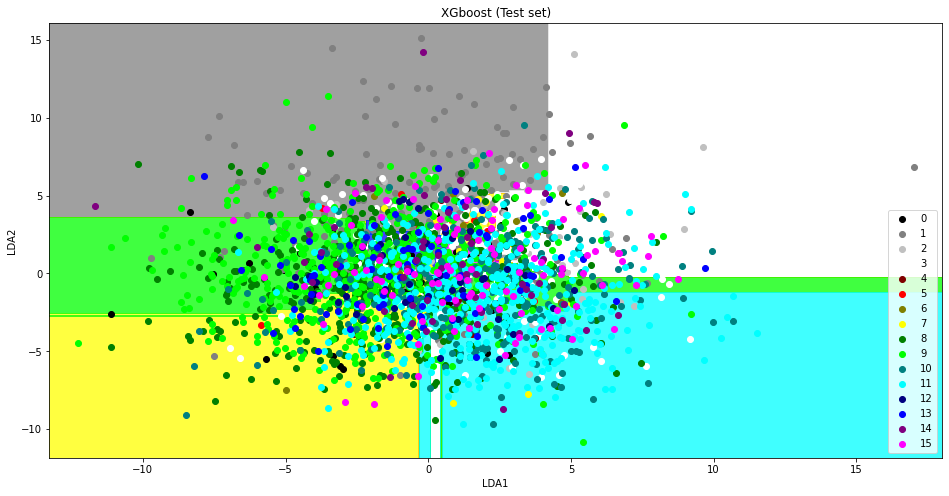

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
plt.figure(figsize = (16,8))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#000000','#808080','#C0C0C0','#FFFFFF', '#800000','#FF0000',	'#808000','#FFFF00','#008000','#00FF00','#008080','#00FFFF','#000080','#0000FF','#800080','#FF00FF')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#000000','#808080','#C0C0C0','#FFFFFF', '#800000','#FF0000',	'#808000','#FFFF00','#008000','#00FF00','#008080','#00FFFF','#000080','#0000FF','#800080','#FF00FF'))(i), label = j)
plt.title('XGboost (Training set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()
plt.figure(figsize = (16,8))
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#000000','#808080','#C0C0C0','#FFFFFF', '#800000','#FF0000',	'#808000','#FFFF00','#008000','#00FF00','#008080','#00FFFF','#000080','#0000FF','#800080','#FF00FF')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#000000','#808080','#C0C0C0','#FFFFFF', '#800000','#FF0000',	'#808000','#FFFF00','#008000','#00FF00','#008080','#00FFFF','#000080','#0000FF','#800080','#FF00FF'))(i), label = j)
plt.title('XGboost (Test set)')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()

In [ ]:
accouracy = {'Models': ['Logistic Regression', 'K Nearest Neighbors', 'Naive bayes', 'SVC','Decision tree', 'Random Forest','XGBoost','XGBoost(LDA)'], 'Scores': [LS, KS, NS,SVC_S,TS,FS,XGB_S,XGBoost_lda_S ]}  
 
accouracy = pd.DataFrame(accouracy) 
accouracy.sort_values('Scores',ascending=False)

,Models,Scores
6,XGBoost,0.695352
7,XGBoost(LDA),0.694170
3,SVC,0.648483
0,Logistic Regression,0.601229
4,Decision tree,0.541299
5,Random Forest,0.536688
1,K Nearest Neighbors,0.422589
2,Naive bayes,0.215905


In [ ]:
input="abid  hossain masum ?/ 274"
post = re.sub('[^a-zA-Z]',' ', input)
post = post.lower()
post = post.split()
ps = PorterStemmer()
post = [ps.stem(word) for word in posts if not word in set(stopwords.words('english'))]
post = ' '.join(post)
post

'l n g   n c   p e r n l c f   l h u g h   e e   c h n g   n e   b   u     g   b c k   e w h e r   l k e   u u l   u r n   c r   h p   w w w   u u b   c   w c h   v   e e w   n   k   v e r w h e l   w r l   r u n   n e   r e   c h e   l r g   h w   c r e u r   e n   e l   f e l   v e   e l   r e   e n   r e c h   f e   h p p e n   w e l l   v r   c r   c l c k w r k   c r e u r   l w   l k e   n e r   w r k e r   r   j b   k n     h n k   r e p l   p p r e c   h e l p   g e   n   h n k   e v e r n   r g h   p n n   h w e v   n   p e p l   b u   r g h   p   e   r n   n   h n g   x   h n k   v c   e v e r n   h n k   h n k   n e e   h u u r   g h   h w   b   k n w   n h   h r h   l k e   h r w   b e   l h u g h   p l c e   g   r e l l   r e l l   k n w   j u g   p e r n   p e     u   n r v e r     e x r v e r   p   k   u n e r n   w n   f e e l   l k e   e n   g   p r b l e   e l l   p r e n   w n   e l l   r e l l   k n w     c n e p   l w   u p p   p e n   f e r n n   b u r   b k   w r

'#000000','#808080','#C0C0C0','#FFFFFF', '#800000','#FF0000',	'#808000','#FFFF00','#008000','#00FF00','#008080','#00FFFF','#000080','#0000FF','#800080','#FF00FF'